In [550]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import scipy.stats as stat
import datetime as dt
import seaborn as sb
import re
%matplotlib inline
from sklearn.linear_model import LinearRegression as lm

In [551]:
file1 = pd.read_csv('Transactions.csv')
file2 = pd.read_csv('NewCustomerList.csv')
file3 = pd.read_csv('CustomerDemographic.csv')
file4 = pd.read_csv('CustomerAddress.csv')

In [552]:
NewFile = pd.merge(file3, file4, on=['customer_id'])
NewFile1 = pd.merge(NewFile, file1, on=['customer_id'])

In [553]:
NewFile1.to_csv("KPMG_Final.csv", index=False, encoding='utf-8-sig')

In [554]:
data = NewFile1.sort_values(by=['customer_id'])

In [555]:
data

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01
10,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01
8,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,1970-01-01
7,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,1970-01-01
6,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19964,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Assistant IV,Entertainment,Affluent Customer,False,...,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,1970-01-01
19966,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Assistant IV,Entertainment,Affluent Customer,False,...,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01
19962,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Assistant IV,Entertainment,Affluent Customer,False,...,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,1970-01-01
19963,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Assistant IV,Entertainment,Affluent Customer,False,...,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1970-01-01


In [556]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19968 non-null  int64  
 1   first_name                           19968 non-null  object 
 2   last_name                            19968 non-null  object 
 3   gender                               19968 non-null  object 
 4   past_3_years_bike_related_purchases  19968 non-null  int64  
 5   dob                                  19522 non-null  object 
 6   job_title                            19968 non-null  object 
 7   job_industry_category                19968 non-null  object 
 8   wealth_segment                       19968 non-null  object 
 9   deceased_indicator                   19968 non-null  bool   
 10  owns_car                             19968 non-null  bool   
 11  tenure                      

In [557]:
data.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost
count,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19794.000000
mean,1740.254307,48.757412,10.689052,2987.623347,7.516376,9997.846504,45.365986,0.501102,1107.780004,556.082756
std,1009.819066,28.611359,5.611093,851.306647,2.824783,5773.929973,30.750115,0.500011,582.852548,405.798188
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000
25%,861.750000,24.000000,6.000000,2200.000000,6.000000,4997.750000,18.000000,0.000000,575.270000,215.140000
50%,1739.500000,48.000000,11.000000,2767.000000,8.000000,9996.500000,44.000000,1.000000,1163.890000,507.580000
75%,2614.250000,73.000000,15.000000,3754.000000,10.000000,14996.250000,72.000000,1.000000,1635.300000,795.100000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000


In [558]:
data.duplicated().sum()

0

In [559]:
data.nunique()

customer_id                             3489
first_name                              2835
last_name                               3268
gender                                     3
past_3_years_bike_related_purchases      100
dob                                     3047
job_title                                195
job_industry_category                      9
wealth_segment                             3
deceased_indicator                         2
owns_car                                   2
tenure                                    22
address                                 3487
postcode                                 835
state                                      3
country                                    1
property_valuation                        12
transaction_id                         19968
product_id                               101
transaction_date                         364
online_order                               2
order_status                               2
brand     

In [560]:
data.isnull().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
dob                                    446
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_lin

In [561]:
data.standard_cost.mode()

0    388.92
Name: standard_cost, dtype: float64

In [562]:
data.standard_cost.mean()

556.0827558856358

In [563]:
data.standard_cost.median()

507.58

In [564]:
data['standard_cost'].fillna(data['standard_cost'].mean(), inplace=True)

In [565]:
data.isnull().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
dob                                    446
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_lin

In [566]:
data['product_first_sold_date'].fillna(method='ffill', inplace=True)

In [567]:
data['dob'] = data['dob'].apply(pd.to_datetime)

In [568]:
data.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
dob                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                               bool
owns_car                                         bool
tenure                                        float64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
transaction_id                                  int64
product_id                  

In [569]:
data.isnull().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
dob                                    446
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_lin

In [570]:
data['dob'].fillna(method='ffill', inplace=True)

In [571]:
date = dt.datetime.now()
data['Age'] = data['dob'].apply(lambda x: len(pd.date_range(start = x, end = date, freq='Y')))

In [572]:
data = data[data.Age<100]

In [573]:
data['transaction_month'] = pd.DatetimeIndex(data['dob']).month

C:\Users\tiwar\AppData\Local\Temp\ipykernel_8876\1446554576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transaction_month'] = pd.DatetimeIndex(data['dob']).month


In [574]:
data['profit'] = data['list_price'] - data['standard_cost']

C:\Users\tiwar\AppData\Local\Temp\ipykernel_8876\332391185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['profit'] = data['list_price'] - data['standard_cost']


In [575]:
data['transaction_date'].head()

0     2017-01-05
10    2017-12-23
8     2017-12-09
7     2017-06-04
6     2017-05-19
Name: transaction_date, dtype: object

In [576]:
data['recent_purchase_date'] = pd.DatetimeIndex(data['transaction_date']).date

C:\Users\tiwar\AppData\Local\Temp\ipykernel_8876\663710618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recent_purchase_date'] = pd.DatetimeIndex(data['transaction_date']).date


In [577]:
data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit,recent_purchase_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Standard,medium,medium,360.40,270.30,1970-01-01,69,10,90.10,2017-01-05
10,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Standard,medium,medium,235.63,125.07,1970-01-01,69,10,110.56,2017-12-23
8,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Road,medium,medium,742.54,667.40,1970-01-01,69,10,75.14,2017-12-09
7,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Standard,medium,medium,642.70,211.37,1970-01-01,69,10,431.33,2017-06-04
6,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Road,medium,medium,1538.99,829.65,1970-01-01,69,10,709.34,2017-05-19


In [578]:
recency_data = data.groupby(by='customer_id', as_index=False)['recent_purchase_date'].max()
recency_data.columns = ['customer_id','LastPurshaceDate']
recency_data.head()

,customer_id,LastPurshaceDate
0,1,2017-12-23
1,2,2017-08-24
2,4,2017-06-18
3,5,2017-12-14
4,6,2017-10-27


In [579]:
data['transaction_date'].max()

'2017-12-30'

In [580]:
now = dt.date(2017,12,30)
print(now)

2017-12-30


In [581]:
recency_data['Recency'] = recency_data['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [582]:
recency_data.head()

,customer_id,LastPurshaceDate,Recency
0,1,2017-12-23,7
1,2,2017-08-24,128
2,4,2017-06-18,195
3,5,2017-12-14,16
4,6,2017-10-27,64


In [583]:
recency_data.drop('LastPurshaceDate',axis=1,inplace=True)

In [584]:
recency_data.head()

,customer_id,Recency
0,1,7
1,2,128
2,4,195
3,5,16
4,6,64


In [585]:
#data_copy = data

In [586]:
frequency_data = data.groupby(by=['customer_id'], as_index=False)['transaction_id'].count()
frequency_data.columns = ['customer_id','Frequency']
frequency_data.head()

,customer_id,Frequency
0,1,11
1,2,3
2,4,2
3,5,6
4,6,5


In [589]:
monetary_data = data.groupby(by='customer_id',as_index=False).agg({'profit': 'sum'})
monetary_data.columns = ['customer_id','Monetary']
monetary_data.head()

,customer_id,Monetary
0,1,3018.09
1,2,2226.26
2,4,220.57
3,5,2394.94
4,6,3946.55


In [590]:
temp_data = recency_data.merge(frequency_data,on='customer_id')
temp_data.head()

,customer_id,Recency,Frequency
0,1,7,11
1,2,128,3
2,4,195,2
3,5,16,6
4,6,64,5


In [591]:
rfm_data = temp_data.merge(monetary_data,on='customer_id')
rfm_data.set_index('customer_id',inplace=True)
rfm_data.head()

,Recency,Frequency,Monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
4,195,2,220.57
5,16,6,2394.94
6,64,5,3946.55


In [592]:
rfm_data.shape

(3488, 3)

In [593]:
quantiles = rfm_data.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,4.0,1871.435000
0.50,44.0,6.0,2891.568622
0.75,85.0,7.0,4236.987500


In [594]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 44.0, 0.75: 85.0},
 'Frequency': {0.25: 4.0, 0.5: 6.0, 0.75: 7.0},
 'Monetary': {0.25: 1871.435, 0.5: 2891.5686220571815, 0.75: 4236.9875}}

In [595]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [596]:
rfm_segmentation = rfm_data
rfm_segmentation['R_Score'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Score'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Score'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [597]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
6,64,5,3946.55,2,2,3


In [598]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Score.map(str) \
                            + rfm_segmentation.F_Score.map(str) \
                            + rfm_segmentation.M_Score.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMScore
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,443
2,128,3,2226.26,1,1,2,112
4,195,2,220.57,1,1,1,111
5,16,6,2394.94,4,2,2,422
6,64,5,3946.55,2,2,3,223


In [599]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMScore
customer_id,,,,,,,
1460,12,8,10787.600000,4,4,4,444
1558,8,9,10640.300000,4,4,4,444
729,1,10,10497.780000,4,4,4,444
322,1,12,10341.570000,4,4,4,444
2762,16,10,9679.087244,4,4,4,444
3232,8,13,8903.620000,4,4,4,444
832,17,12,8868.620000,4,4,4,444
2860,8,10,8670.177244,4,4,4,444
1140,6,13,8533.230000,4,4,4,444


In [600]:
#print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
#print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Score']==4]))
#print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Score']==4]))
#print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
#print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
#print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

In [601]:
rfm_segmentation['Customer_Segmentation'] = np.where(rfm_segmentation['RFMScore'] ==444, "Best Customers",
                                (np.where(rfm_segmentation['F_Score'] == 4,"Loyal Customers",
                                (np.where(rfm_segmentation['M_Score'] == 4, "Big Spenders",
                                (np.where(rfm_segmentation['F_Score'] == 3, "Gold Customers",
                                (np.where(rfm_segmentation['F_Score'] == 2, "Silver Customers",
                                (np.where(rfm_segmentation['RFMScore'] == 244,"Almost Lost",
                               (np.where(rfm_segmentation['RFMScore'] == 144, "Lost Customers",
                               np.where(rfm_segmentation['RFMScore'] == 111,'Lost Cheap Customers', 'Low Value Customers'
                                        ))))))))))))))


In [602]:
rfm_segmentation

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMScore,Customer_Segmentation
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Loyal Customers
2,128,3,2226.26,1,1,2,112,Low Value Customers
4,195,2,220.57,1,1,1,111,Low Value Customers
5,16,6,2394.94,4,2,2,422,Silver Customers
6,64,5,3946.55,2,2,3,223,Silver Customers
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,Low Value Customers
3497,52,3,1648.32,2,1,1,211,Low Value Customers
3498,127,6,3147.33,1,2,3,123,Silver Customers


In [603]:
rfsegment = pd.merge(rfm_segmentation, data, on=['customer_id'])

In [604]:
data = rfsegment.sort_values(by=['customer_id'])

In [605]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19959 entries, 0 to 19958
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19959 non-null  int64         
 1   Recency                              19959 non-null  int64         
 2   Frequency                            19959 non-null  int64         
 3   Monetary                             19959 non-null  float64       
 4   R_Score                              19959 non-null  int64         
 5   F_Score                              19959 non-null  int64         
 6   M_Score                              19959 non-null  int64         
 7   RFMScore                             19959 non-null  object        
 8   Customer_Segmentation                19959 non-null  object        
 9   first_name                           19959 non-null  object        
 10  last_name 

In [606]:
data['Customer_Segmentation'].value_counts()

Loyal Customers        6692
Silver Customers       5245
Low Value Customers    3466
Big Spenders           2477
Gold Customers         2079
Name: Customer_Segmentation, dtype: int64

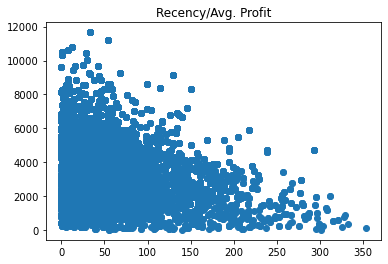

In [628]:
plt.scatter(data['Recency'], data['Monetary'])
plt.title('Recency/Avg. Profit')
plt.savefig("RecedncyAvgProfit.png")
plt.show()

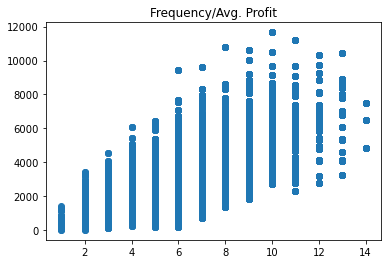

In [629]:
plt.scatter(data['Frequency'], data['Monetary'])
plt.title('Frequency/Avg. Profit')
plt.savefig("FrequencyAvgProfit.png")
plt.show()

In [630]:
data1 = file2

In [631]:
data1

,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.719
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.719
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.719
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357


In [632]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            1000 non-null   object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   dob                                  983 non-null    object 
 5   job_title                            1000 non-null   object 
 6   job_industry_category                1000 non-null   object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [633]:
data1.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,rank,value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881722
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293550
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649500
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.719000


In [634]:
data1.isnull().sum()

first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
dob                                    17
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
rank                                    0
value                                   0
dtype: int64

In [635]:
data1['customer_id'] = data1.index

In [636]:
data1['dob'] = pd.to_datetime(data1['dob'], errors='coerce')

In [637]:
data1['dob'] = data1['dob'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')

In [638]:
data1['dob'] = data1['dob'].fillna(data1['dob'].mode())

In [639]:
date1 = dt.datetime.now()
data1['Age'] = data1['dob'].apply(lambda x: len(pd.date_range(start = x, end = date1, freq = 'Y'))if str(x) else None)

In [640]:
data1 = data1[data1.Age < 100]

In [658]:
data.to_excel('./CurrentCustomers.xlsx', index=False)
data1.to_excel('./TargetNewCustomers.xlsx',index=False)